# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("data/advertising.csv")
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day_of_week
df["Month"] = df["Timestamp"].dt.month

In [ ]:
df.drop(columns=["City", "Country", "Ad Topic Line", "Timestamp"], inplace=True)

In [ ]:
df

# 1. Exploratory Data Analysis

In [ ]:
print(df['Clicked on Ad'].value_counts())


In [ ]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

In [ ]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


In [ ]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [ ]:
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']




#### 2. Train test split


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)


In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)



In [27]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)


#### 3. StandardScaler()


# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [25]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Accuracy en cada fold de la CV:", cv_scores)
print("Media de Accuracy en cross-validation:", cv_scores.mean())

c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Accuracy en cada fold de la CV: [0.90625 0.94375 0.8625  0.90625 0.9125 ]
Media de Accuracy en cross-validation: 0.90625


# 4. Evaluation


In [31]:
y_pred = model.predict(x_test)

print("Accuracy en el test set:", accuracy_score(y_test, y_pred))
print()
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print()
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy en el test set: 0.945

Matriz de confusión:
 [[ 83   6]
 [  5 106]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200




#### 1. Confusion Matrix


In [33]:
import sklearn.metrics as metrics
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 83   6]
 [  5 106]]


<Axes: >

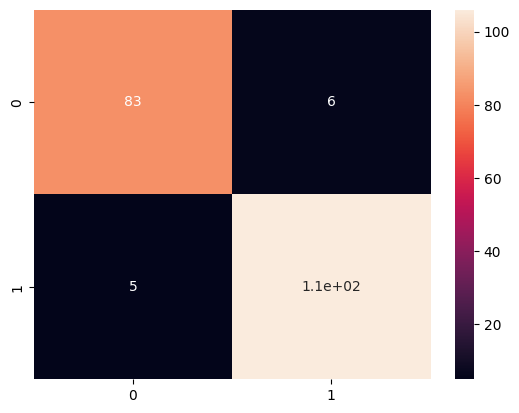

In [40]:
sns.heatmap(cm,annot=True)


#### 2. Precision


In [36]:
precision = metrics.precision_score(x_test, y_test)
print(precision)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets



#### 3. Recall


In [38]:
recall = metrics.recall_score(x_test, y_test)
print(recall)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets



#### 4. F1 Score


In [ ]:
f1 = metrics.f1_score(x_test, y_test)
print(f1 * 100, "%")

TypeError: too many positional arguments



#### 5. ROC curve



#### 6. P-R curve